In [277]:
import math
import numpy as np

from sympy import symbols, sin, cos, pi, Point, Line, Point2D, diff, oo
from sympy.simplify import simplify




In [390]:
t, u = symbols('t, u')
# x = 16*np.sin(t)**3
# y = 13*np.cos(t) - 5*(np.cos(2*t)) -2*np.cos(3*t) - np.cos(4*t)
x1 = 16*(sin(t)**3)
y1 = 13*cos(t) - 5*(cos(2*t)) -2*cos(3*t) - cos(4*t)
x2 = 16*(sin(u)**3)
y2 = 13*cos(u) - 5*(cos(2*u)) -2*cos(3*u) - cos(4*u)

In [316]:
from sympy.plotting import plot_parametric
from sympy.plotting.plot import Parametric2DLineSeries, flat

In [317]:
from sympy import sympify, Expr, Tuple, Dummy, Symbol
from sympy.external import import_module
from sympy.core.compatibility import range, Callable
from sympy.utilities.iterables import is_sequence
from sympy.plotting.experimental_lambdify import (vectorized_lambdify, lambdify)

In [ ]:
class ParametricSVG:
    def __init__(self, expr_x, expr_y):
        for param in expr_x.atoms():
            if type(param):
                t = param
                if t not in expr_y.atoms():
                    raise 
                break
            
        for param in expr_y.atoms():
            if type(param):
                t = param
                break

In [741]:
for x in x1.atoms():
    print(type(x))

<class 'sympy.core.numbers.Integer'>
<class 'sympy.core.numbers.Integer'>
<class 'sympy.core.symbol.Symbol'>


In [366]:
class MyParametricLine(Parametric2DLineSeries):
    def get_segments(self):
        """
        Adaptively gets segments for plotting.

        The adaptive sampling is done by recursively checking if three
        points are almost collinear. If they are not collinear, then more
        points are added between those points.

        References
        ==========
        [1] Adaptive polygonal approximation of parametric curves,
            Luiz Henrique de Figueiredo.

        """
        if not self.adaptive:
            return super(Parametric2DLineSeries, self).get_segments()

        f_x = lambdify([self.var], self.expr_x)
        f_y = lambdify([self.var], self.expr_y)
        list_segments = []
        point_list = []

        def sample(param_p, param_q, p, q, depth):
            """ Samples recursively if three points are almost collinear.
            For depth < 6, points are added irrespective of whether they
            satisfy the collinearity condition or not. The maximum depth
            allowed is 12.
            """
            #Randomly sample to avoid aliasing.
            np = import_module('numpy')
            random = 0.45 + np.random.rand() * 0.1
            param_new = param_p + random * (param_q - param_p)
            xnew = f_x(param_new)
            ynew = f_y(param_new)
            new_point = np.array([xnew, ynew])

            #Maximum depth
            if depth > self.depth:
                list_segments.append([p, q])
                point_list.append(param_p)
                
            #Sample irrespective of whether the line is flat till the
            #depth of 6. We are not using linspace to avoid aliasing.
            elif depth < 6:
                sample(param_p, param_new, p, new_point, depth + 1)
                sample(param_new, param_q, new_point, q, depth + 1)

            #Sample ten points if complex values are encountered
            #at both ends. If there is a real value in between, then
            #sample those points further.
            elif ((p[0] is None and q[1] is None) or
                    (p[1] is None and q[1] is None)):
                param_array = np.linspace(param_p, param_q, 10)
                x_array = list(map(f_x, param_array))
                y_array = list(map(f_y, param_array))
                if any(x is not None and y is not None
                        for x, y in zip(x_array, y_array)):
                    for i in range(len(y_array) - 1):
                        if ((x_array[i] is not None and y_array[i] is not None) or
                                (x_array[i + 1] is not None and y_array[i + 1] is not None)):
                            point_a = [x_array[i], y_array[i]]
                            point_b = [x_array[i + 1], y_array[i + 1]]
                            sample(param_array[i], param_array[i], point_a,
                                   point_b, depth + 1)

            #Sample further if one of the end points in None( ie a complex
            #value) or the three points are not almost collinear.
            elif (p[0] is None or p[1] is None
                    or q[1] is None or q[0] is None
                    or not flat(p, new_point, q)):
                sample(param_p, param_new, p, new_point, depth + 1)
                sample(param_new, param_q, new_point, q, depth + 1)
            else:
                list_segments.append([p, q])
                point_list.append(param_p)

        f_start_x = f_x(self.start)
        f_start_y = f_y(self.start)
        start = [f_start_x, f_start_y]
        f_end_x = f_x(self.end)
        f_end_y = f_y(self.end)
        end = [f_end_x, f_end_y]
        sample(self.start, self.end, start, end, 0)
        return list_segments, point_list

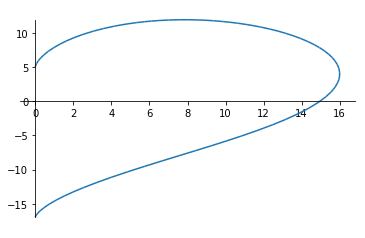

In [426]:
plot_parametric(x1, y1, (t,0,pi))


In [368]:
hi = flahp.get_segments()

In [370]:
hi[1]

[-3.141592653589793,
 -3.0952381074936635,
 -3.0397490947097294,
 -2.9935992025241274,
 -2.9404460679542948,
 -2.887679304132927,
 -2.8444542442969794,
 -2.803613844705966,
 -2.7572036942188314,
 -2.7048730752502275,
 -2.653349948637029,
 -2.595422352949893,
 -2.5333677696638057,
 -2.414657105895927,
 -2.2898217648863195,
 -2.1761610944312895,
 -2.075596496667219,
 -1.96120803758488,
 -1.899780206731615,
 -1.8446303160557673,
 -1.811931010433601,
 -1.7788637984365103,
 -1.7477659519478423,
 -1.7187362887751414,
 -1.696610967481566,
 -1.672072658723116,
 -1.6441036671303306,
 -1.615489488080656,
 -1.5887325503665952,
 -1.563364178637743,
 -1.5305566143661422,
 -1.5014031751854755,
 -1.4720249841403845,
 -1.4394429978551748,
 -1.4117971314169127,
 -1.3844248189465105,
 -1.3610351389241284,
 -1.340954217458306,
 -1.3207664814932512,
 -1.2968749791669862,
 -1.273245365876058,
 -1.2468986479612612,
 -1.2227522971432847,
 -1.194421582947264,
 -1.1724619920357566,
 -1.1517924792673044,
 -1.12

In [258]:
t

t

In [436]:
x = 16*np.sin(t)**3
y = (13*np.cos(t) - 5*(np.cos(2*t)) -2*np.cos(3*t) - np.cos(4*t))


AttributeError: 'Symbol' object has no attribute 'sin'

In [392]:
g = diff(y1, t)/diff(x1, t)
h = diff(y2, u)/diff(x2, u)



In [405]:
p1 = Point(x1,y1)
p2 = Point(x2,y2)
l1 = Line(p1, slope=g)
l2 = Line(p2, slope=h)


In [386]:
l1.intersection(Line(Point(0,0), Point(1,0)))

[Point2D(16*(-2*(-cos(2*t) + 1)**3*sin(t) - 42*(-cos(2*t) + 1)**2*sin(t) + 19*(-cos(2*t) + 1)**2*sin(2*t) + 3*(-cos(2*t) + 1)**2*sin(5*t) + 439*sin(t)/4 + 99*sin(2*t)/4 - 123*sin(3*t)/2 + 8*sin(5*t) - 33*sin(6*t)/4 + 25*sin(7*t)/4 - sin(9*t))*sin(t)/(-64*sin(t)**5 + 24*sin(t) + 20*sin(2*t) - 34*sin(3*t) - 19*sin(4*t) + 10*sin(5*t) + 6*sin(6*t) + 4*sin(7*t)), 0)]

In [294]:
l1.coefficients

(-48*sin(t)**2*cos(t)/(-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t)),
 1,
 (-16*(-cos(2*t) + 1)**3*sin(2*t) - 130*(-cos(2*t) + 1)**2*sin(t) + 204*(-cos(2*t) + 1)**2*sin(2*t) + 12*(-cos(2*t) + 1)**2*sin(3*t) + 627*sin(t)/2 - 87*sin(2*t)/2 - 595*sin(3*t)/2 + 53*sin(4*t) + 37*sin(5*t) + 6*sin(6*t) + 4*sin(7*t))/(-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t)))

In [406]:
# int_line = l1.intersection(l2)

In [442]:
# int_line = [Point2D((-768*((-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t))*sin(u)**2*cos(u) - (-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*sin(t)**2*cos(t))*(sin(t)**3 - sin(u)**3) + 768*((-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t))*sin(u)**2*cos(u) - (-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*sin(t)**2*cos(t))*sin(t)**3 - 768*(sin(t)**3 - sin(u)**3)*(-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*sin(t)**2*cos(t) + (-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t))*(-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*(13*cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t) - 13*cos(u) + 5*cos(2*u) + 2*cos(3*u) + cos(4*u)))/(48*((-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t))*sin(u)**2*cos(u) - (-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*sin(t)**2*cos(t))), (((-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t))*sin(u)**2*cos(u) - (-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*sin(t)**2*cos(t))*(-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t))*(13*cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t)) - (768*((-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t))*sin(u)**2*cos(u) - (-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*sin(t)**2*cos(t))*(sin(t)**3 - sin(u)**3) + 768*(sin(t)**3 - sin(u)**3)*(-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*sin(t)**2*cos(t) - (-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t))*(-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*(13*cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t) - 13*cos(u) + 5*cos(2*u) + 2*cos(3*u) + cos(4*u)))*sin(t)**2*cos(t))/(((-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t))*sin(u)**2*cos(u) - (-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*sin(t)**2*cos(t))*(-13*sin(t) + 10*sin(2*t) + 6*sin(3*t) + 4*sin(4*t))))]
int_line = [Point2D(16*sin(t)**3 + ((16*sin(t)**3 - 16*sin(u)**3)*(2*sin(t)/3 + 13/(24*sin(2*t)) - 3/(4*sin(t)) - sin(3*t)/(2*(cos(t) - cos(3*t)))) - (16*sin(t)**3 - 16*sin(u)**3)*(2*sin(t)/3 - 2*sin(u)/3 - 13/(24*sin(2*u)) + 3/(4*sin(u)) + 13/(24*sin(2*t)) - 3/(4*sin(t)) + sin(3*u)/(2*(cos(u) - cos(3*u))) - sin(3*t)/(2*(cos(t) - cos(3*t)))) + 13*cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t) - 13*cos(u) + 5*cos(2*u) + 2*cos(3*u) + cos(4*u))/(2*sin(t)/3 - 2*sin(u)/3 - 13/(24*sin(2*u)) + 3/(4*sin(u)) + 13/(24*sin(2*t)) - 3/(4*sin(t)) + sin(3*u)/(2*(cos(u) - cos(3*u))) - sin(3*t)/(2*(cos(t) - cos(3*t)))), -(2*sin(t)/3 + 13/(24*sin(2*t)) - 3/(4*sin(t)) - sin(3*t)/(2*(cos(t) - cos(3*t))))*((16*sin(t)**3 - 16*sin(u)**3)*(2*sin(t)/3 + 13/(24*sin(2*t)) - 3/(4*sin(t)) - sin(3*t)/(2*(cos(t) - cos(3*t)))) - (16*sin(t)**3 - 16*sin(u)**3)*(2*sin(t)/3 - 2*sin(u)/3 - 13/(24*sin(2*u)) + 3/(4*sin(u)) + 13/(24*sin(2*t)) - 3/(4*sin(t)) + sin(3*u)/(2*(cos(u) - cos(3*u))) - sin(3*t)/(2*(cos(t) - cos(3*t)))) + 13*cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t) - 13*cos(u) + 5*cos(2*u) + 2*cos(3*u) + cos(4*u))/(2*sin(t)/3 - 2*sin(u)/3 - 13/(24*sin(2*u)) + 3/(4*sin(u)) + 13/(24*sin(2*t)) - 3/(4*sin(t)) + sin(3*u)/(2*(cos(u) - cos(3*u))) - sin(3*t)/(2*(cos(t) - cos(3*t)))) + 13*cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t))]


In [407]:
int_line

[Point2D(16*sin(t)**3 + ((16*sin(t)**3 - 16*sin(u)**3)*(2*sin(t)/3 + 13/(24*sin(2*t)) - 3/(4*sin(t)) - sin(3*t)/(2*(cos(t) - cos(3*t)))) - (16*sin(t)**3 - 16*sin(u)**3)*(2*sin(t)/3 - 2*sin(u)/3 - 13/(24*sin(2*u)) + 3/(4*sin(u)) + 13/(24*sin(2*t)) - 3/(4*sin(t)) + sin(3*u)/(2*(cos(u) - cos(3*u))) - sin(3*t)/(2*(cos(t) - cos(3*t)))) + 13*cos(t) - 5*cos(2*t) - 2*cos(3*t) - cos(4*t) - 13*cos(u) + 5*cos(2*u) + 2*cos(3*u) + cos(4*u))/(2*sin(t)/3 - 2*sin(u)/3 - 13/(24*sin(2*u)) + 3/(4*sin(u)) + 13/(24*sin(2*t)) - 3/(4*sin(t)) + sin(3*u)/(2*(cos(u) - cos(3*u))) - sin(3*t)/(2*(cos(t) - cos(3*t)))), -(2*sin(t)/3 + 13/(24*sin(2*t)) - 3/(4*sin(t)) - sin(3*t)/(2*(cos(t) - cos(3*t))))*((16*sin(t)**3 - 16*sin(u)**3)*(2*sin(t)/3 + 13/(24*sin(2*t)) - 3/(4*sin(t)) - sin(3*t)/(2*(cos(t) - cos(3*t)))) - (16*sin(t)**3 - 16*sin(u)**3)*(2*sin(t)/3 - 2*sin(u)/3 - 13/(24*sin(2*u)) + 3/(4*sin(u)) + 13/(24*sin(2*t)) - 3/(4*sin(t)) + sin(3*u)/(2*(cos(u) - cos(3*u))) - sin(3*t)/(2*(cos(t) - cos(3*t)))) + 13*cos(t)

In [ ]:
int_point = int_line[0]
def get_intersection_points(min_t, max_t, steps=100):
    """
    num_cycles: 
        how many times does the spiral go around (this will be rounded up to give a complete segment)
    angle_change:
        how large is the change in angle for each quadratic segment
    """
#     t_range = np.linspace(min_t, max_t, num=steps, endpoint=True)
    flahp = MyParametricLine(x1,y1, (t,min_t,max_t), nb_of_points=steps)
    t_range = flahp.get_segments()[1]


    for i, t2 in enumerate(t_range[:-1]):
        u = t_range[i+1]
        try:             
            yield {"int_point": int_point.subs({"t":t2, "u":u}),
                   "t": t,
                   "u": u,
                  }
        except ValueError:
            t3 = t2+0.0000001
            yield {"int_point": int_point.subs({"t":t3, "u":u}),
                       "t": t,
                       "u": u,
                      }


        

 

In [ ]:
       
def get_quad_control_points(min_t, max_t, steps=100):
    for x in get_intersection_points(min_t, max_t, steps=steps):
        yield (tuple(map(float, x['int_point'].args)), 
               tuple(map(float, p2.subs({'u':x['u']}).args))
              )

In [2]:
import json
def store_data(fname, quad_points, initial_point):
    data = {"quad_points": quad_points,
     "initial_point": initial_point
    }
    with open(fname, "w") as fp:
        json.dump(data, fp)

def load_data(fname):
    with open(fname, "r") as fp:
        return json.load(fp)

In [ ]:
t_0 = 0
t_max = 2*pi
quad_iter = get_quad_control_points(min_t=t_0, max_t=t_max, steps=10)
quad_points = list(quad_iter)
initial_point = list(map(float, p1.subs({"t":t_0}).args))

In [1231]:
store_data('heart_quads.json', quad_points, initial_point)

In [1234]:
hullo = load_data("heart_quads.json")['quad_points']

In [1233]:
hullo

[[[2.26480878769362e-09, 5.01935203545116],
  [0.00240468499265089, 5.05784209373124]],
 [[0.00617678614768245, 5.11821945317385],
  [0.0144892681784808, 5.19071052417724]],
 [[0.0249796452381706, 5.28219447150715],
  [0.0416669391001586, 5.38322902221801]],
 [[0.0625689845764014, 5.50978212250472],
  [0.0921242540272451, 5.64469196933818]],
 [[0.129325564905271, 5.81450341906648],
  [0.178888071354544, 5.99135494886849]],
 [[0.227032997926876, 6.16314819595208],
  [0.285852572783466, 6.33796304924934]],
 [[0.345659522697073, 6.51571243286517],
  [0.415701700411068, 6.69417844133358]],
 [[0.487743067528425, 6.87773834271958],
  [0.569888188951648, 7.06019887319993]],
 [[0.692043825721294, 7.33153065651206],
  [0.834806300015498, 7.59665683949396]],
 [[0.918421740467044, 7.75194024064588], [1.00862101667763, 7.90415568501767]],
 [[1.12167926629051, 8.09494670272544], [1.24449884261148, 8.27994312284276]],
 [[1.44189780344349, 8.57727439675439], [1.66250874377508, 8.85670281234556]],
 [[

In [1198]:
quad_points

[((2.26480878769362e-09, 5.01935203545116),
  (0.00240468499265089, 5.05784209373124)),
 ((0.00617678614768245, 5.11821945317385),
  (0.0144892681784808, 5.19071052417724)),
 ((0.0249796452381706, 5.28219447150715),
  (0.0416669391001586, 5.38322902221801)),
 ((0.0625689845764014, 5.50978212250472),
  (0.0921242540272451, 5.64469196933818)),
 ((0.129325564905271, 5.81450341906648),
  (0.178888071354544, 5.99135494886849)),
 ((0.227032997926876, 6.16314819595208),
  (0.285852572783466, 6.33796304924934)),
 ((0.345659522697073, 6.51571243286517),
  (0.415701700411068, 6.69417844133358)),
 ((0.487743067528425, 6.87773834271958),
  (0.569888188951648, 7.06019887319993)),
 ((0.692043825721294, 7.33153065651206),
  (0.834806300015498, 7.59665683949396)),
 ((0.918421740467044, 7.75194024064588), (1.00862101667763, 7.90415568501767)),
 ((1.12167926629051, 8.09494670272544), (1.24449884261148, 8.27994312284276)),
 ((1.44189780344349, 8.57727439675439), (1.66250874377508, 8.85670281234556)),
 ((

In [21]:
import json
import math

import numpy as np

from uuid import uuid4

from vdom.svg import *
from vdom.svg import g as group

In [5]:

def store_data(fname, quad_points, initial_point):
    data = {"quad_points": quad_points,
     "initial_point": initial_point
    }
    with open(fname, "w") as fp:
        json.dump(data, fp)

def load_data(fname):
    with open(fname, "r") as fp:
        return json.load(fp)

In [8]:
# quads = quad_points
data = load_data('heart_quads.json')
quads = data['quad_points']
initial_point = data['initial_point']
center = 0

# d = f'M{center+initial_point[0]},{center+initial_point[1]} {" ".join("Q"+",".join(map(str, (q+center for q in quad[0])))+" "+",".join(map(str, (q+center for q in quad[1]))) for quad in quads)} '
d = f'M{initial_point[0]},{initial_point[1]} {" ".join("Q"+",".join(map(str, (q for q in quad[0])))+" "+",".join(map(str, (q for q in quad[1]))) for quad in quads)} '
def gen_id():
    return f"{uuid4()}".replace("-","")

myid = gen_id()

In [385]:
def gen_heart(myid=None):
    if myid is None:
        myid = gen_id()
    d = f'M{initial_point[0]},{initial_point[1]} {" ".join("Q"+",".join(map(str, (q for q in quad[0])))+" "+",".join(map(str, (q for q in quad[1]))) for quad in quads)} Z'
    my_heart = path(
        id=f"{myid}",
        fill="none", 
        stroke="red",
        d=d,
        transform = "scale(1.25 -1.25)",
        **{"stroke-width": ".5"}
        )

    
    return my_heart


In [11]:
def grid():
    
    return group(
        line(x1="-50%", y1="0%", x2="50%", y2="0%", stroke="black", **{"stroke-width":".25"}),
        line(x1="0%", y1="-50%", x2="0%", y2="50%", stroke="black", **{"stroke-width":".25"}),
    )


In [12]:
a_heart = svg(gen_heart(),
              grid(),
              viewBox="-25 -25 50 50",)
display(a_heart)

<svg viewBox="-25 -25 50 50"><path d="M0.0,5.0 Q2.26480878769362e-09,5.01935203545116 0.00240468499265089,5.05784209373124 Q0.00617678614768245,5.11821945317385 0.0144892681784808,5.19071052417724 Q0.0249796452381706,5.28219447150715 0.0416669391001586,5.38322902221801 Q0.0625689845764014,5.50978212250472 0.0921242540272451,5.64469196933818 Q0.129325564905271,5.81450341906648 0.178888071354544,5.99135494886849 Q0.227032997926876,6.16314819595208 0.285852572783466,6.33796304924934 Q0.345659522697073,6.51571243286517 0.415701700411068,6.69417844133358 Q0.487743067528425,6.87773834271958 0.569888188951648,7.06019887319993 Q0.692043825721294,7.33153065651206 0.834806300015498,7.59665683949396 Q0.918421740467044,7.75194024064588 1.00862101667763,7.90415568501767 Q1.12167926629051,8.09494670272544 1.24449884261148,8.27994312284276 Q1.44189780344349,8.57727439675439 1.66250874377508,8.85670281234556 Q1.80054060640138,9.03153559541965 1.94694688614682,9.19842404729501 Q2.08999423977703,9.36148366081515 2.24054566891579,9.51639833059041 Q2.48490085256662,9.76783534981824 2.74741879975013,9.99621086079807 Q3.01662696842382,10.2304064795754 3.30291999709097,10.4385942042024 Q3.46972317871875,10.5598908176942 3.64179542494331,10.6719572214367 Q3.79857226878001,10.7740621074039 3.95941554482475,10.8683033405894 Q4.13334243392154,10.9702105195257 4.31166833497306,11.0627149706127 Q4.47604708828145,11.1479845038409 4.64386151028959,11.2251070150907 Q4.80544594869858,11.299366411392 4.96995032351617,11.3659501831024 Q5.16725965014621,11.4458118838945 5.36835311845226,11.5144650549576 Q5.56561833961004,11.5818112650908 5.7660857806164,11.6382214352365 Q5.93594304380552,11.6860181101922 6.10780540394526,11.7258795037075 Q6.3802811445957,11.7890769525997 6.65689783599178,11.8321328272072 Q6.88756600251257,11.8680367330906 7.12039035026157,11.8898178268749 Q7.33575429714658,11.9099654719568 7.5524023719199,11.9179755377665 Q7.78903411552322,11.9267244539104 8.02650188595541,11.9209696911957 Q8.31148267851657,11.9140635041521 8.59647282523938,11.8863060110558 Q8.84172783653293,11.8624186438571 9.08605624824551,11.8231757557194 Q9.29602775102361,11.7894511138005 9.5047004646898,11.7444820539865 Q9.73546771599974,11.6947516117789 9.96389320433066,11.631434414029 Q10.2137994798527,11.5621629628359 10.4598847954114,11.4769149350853 Q10.7426952738113,11.3789447028671 11.0189146985215,11.2604175545564 Q11.2783606307036,11.14908799649 11.5305552606758,11.0202359184706 Q11.8305962880828,10.8669380077389 12.1182124982183,10.6899608334626 Q12.3086605446971,10.5727735681955 12.4928101128895,10.4457122376404 Q12.7138340887796,10.2932079405257 12.9247407405014,10.1272078034175 Q13.1164494580624,9.97631795172166 13.2989309836935,9.81495653041487 Q13.4993501715355,9.63773352169933 13.6876496499027,9.44875874377583 Q13.8259025844505,9.31000999189398 13.9571663998683,9.16537567684822 Q14.0895559130142,9.01950100078341 14.2144709921875,8.86804150073268 Q14.3647042289743,8.68588374135466 14.50359102542,8.496302620215 Q14.6242491373507,8.33160373796121 14.7359701511584,8.16180777241553 Q14.8556947497797,7.9798477889744 14.9647911861361,7.79259020255814 Q15.0815966885041,7.5921004598673 15.1858302302757,7.38620717426887 Q15.2838990649354,7.19249108020058 15.3705462405702,6.99456656547992 Q15.4710479022511,6.76499482847765 15.555848418953,6.53053381443338 Q15.6293410875024,6.32733734508333 15.6908398354807,6.12101489646327 Q15.7582996840502,5.89469352248478 15.811151998362,5.66520400901477 Q15.858001700426,5.46177837907041 15.8932743283624,5.25628456535619 Q15.9234569772515,5.08044431780161 15.9451194504346,4.90333416558016 Q15.9730560934491,4.67492704627213 15.9867773968648,4.44479362169134 Q16.0034165941822,4.16572133934909 15.9991176647554,3.88472444785707 Q15.9950908430473,3.62151371089842 15.9726972179107,3.35708697651958 Q15.9526619394994,3.12050789606779 15.9179459679384,2.88322942110747 Q15.882312030686,2.63967678789829 15.83124032874,2.39559405324708 Q15.78751

In [14]:
blue_heart = svg(clipPath(
        gen_heart(),
        **{"id":"clipid", "fill":"green", }),
    rect(
        x="-20", 
        y="-20", 
        fill='blue', 
        width="50", 
        height="50", 
        style={
#             "transform": "scaleY(-1)", 
            "clip-path": "url(#clipid)"
        },
        ),
     style = {"transform": "scaleY(-1)"},
     viewBox="-20 -20 50 50",
)

In [833]:
import cairosvg

In [15]:
blue_heart.to_html().encode('utf-8')

b'<svg style="transform: scaleY(-1)" viewBox="-20 -20 50 50"><clipPath fill="green" id="clipid"><path d="M0.0,5.0 Q2.26480878769362e-09,5.01935203545116 0.00240468499265089,5.05784209373124 Q0.00617678614768245,5.11821945317385 0.0144892681784808,5.19071052417724 Q0.0249796452381706,5.28219447150715 0.0416669391001586,5.38322902221801 Q0.0625689845764014,5.50978212250472 0.0921242540272451,5.64469196933818 Q0.129325564905271,5.81450341906648 0.178888071354544,5.99135494886849 Q0.227032997926876,6.16314819595208 0.285852572783466,6.33796304924934 Q0.345659522697073,6.51571243286517 0.415701700411068,6.69417844133358 Q0.487743067528425,6.87773834271958 0.569888188951648,7.06019887319993 Q0.692043825721294,7.33153065651206 0.834806300015498,7.59665683949396 Q0.918421740467044,7.75194024064588 1.00862101667763,7.90415568501767 Q1.12167926629051,8.09494670272544 1.24449884261148,8.27994312284276 Q1.44189780344349,8.57727439675439 1.66250874377508,8.85670281234556 Q1.80054060640138,9.0315355

In [722]:
from IPython.display import display_png

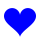

In [876]:
blah = cairosvg.svg2png(blue_heart.to_html().encode('utf-8'))
display_png(blah, raw=True)

In [31]:
total_height = 30
trans = ['lightblue', 'pink', 'white',  'pink', 'lightblue']

def flag(color_list, total_height=30, clipid="clipid", symbol=None, **kwargs):
    height_perc = 73
    shift = 5
    div_heights = np.linspace(-height_perc/2+shift,height_perc/2+shift, num=len(color_list), endpoint=False)
    internal = [rect(x="-25", y=f"{this_h}%", 
                     width="50", height=f"{height_perc/len(color_list)}%", 
                     fill=color_list[i],
                     stroke=color_list[i]
                    ) 
                for i, this_h in enumerate(div_heights)]
    if symbol:
        internal.append(symbol)
    return group(*internal, 
#                  style={"clip-path": f"url(#{clipid})"}, 
                 **kwargs)

In [34]:
trans = ['lightskyblue', 'lightpink', 'white',  'lightpink', 'lightskyblue']
genderqueer = ['forestgreen', 'white', 'purple']
rainbow = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'black']
agender = ['black', 'lightgrey', 'white', 'chartreuse', 'white', 'lightgrey', 'black']
ace = ['black','lightgrey','white', 'purple']
bi = ['deeppink', 'deeppink', 'mediumpurple', 'blue','blue']
enby = ['#ffef00', 'white', '#9C59D1', 'black']
genderfluid = ['#ff75a2', "white","#be18d6", 'black', 'mediumblue']
pan = ['deeppink', "gold", "deepskyblue"]
polysexual = ["#f61cb9", "#07d569", 'dodgerblue']
aromantic = ["#3da542", "#a7d379", "white", "lightgrey", "black"]
lipstick = ["#A60061", "#B95393", "#D260A7", "#EDEDEB", "#E5ABD0", "#C74D52", "#8C1D00"]
intersex = ["gold"]
polyamory = ["blue", "red", "black"]

int_symbol = circle(cx="0", cy="2", r="5", fill="transparent", stroke="purple", **{"stroke-width":"2.5"})
poly_symbol = text("π", y="4.5", fill="yellow", **{'text-anchor': "middle", "font-family": "Minion Pro"})
bear_symbol = path(d="M98.9 24.4c-5.7 0-11.5 1.3-16.3 4.4C61.2 42.6 91.1 48.3 96 51.1c4.7 2.7 22.4 22.9 29.7-8.4 2.2-9.7-12.2-18.3-26.8-18.3m45.4 11.2c-17.7 1.9-.8 43 23.6 44.4 16.5.9 28.9-39.3-23.6-44.4m-94.4 8.9C34.2 44 43.7 73.3 69 83.6c5.1 2.1 14.2-4.7 14.4-16 .1-4.2-7.1-22.2-33.5-23.1m61 17.7c-7.1-.1-14.6 3-22.8 11.5-28.9 30.3 13.8 35.5 10.6 51.9-9.7 48.5-.9 52.5 8.3 55.6 11.7 3.9 33.8-33.4 43.1-40.4 12.4-9.4 77.9-42.2 62.4-58.8-22.3-23.8-27 7.3-57.7-1-14.6-3.9-28.3-18.8-43.9-18.8M54.4 96.5c-2.8-.1-5.5.4-8.1 1.6-11.5 5.2 10.8 36.5 20.9 37.4 12.4 1.1 17.4-8.9 17.6-14.7.3-7.6-15.4-24-30.4-24.3m4 46.7c-4.5.1-8 1.2-9.6 3.3-4.1 6.2 21.6 30.4 28.7 32 6.5 1.5 12.6-13 11.4-18.7-2.2-10.4-19.2-16.7-30.5-16.6",
                   transform = "scale(.1 .1) translate(-120,-100) "
                  ) 



colors =  [trans, genderqueer, rainbow, agender, ace, bi, enby, genderfluid, pan, polysexual, aromantic, lipstick, intersex, polyamory]
symbols = [*[None]*12, int_symbol, poly_symbol]

In [1336]:
# symbols = [*[None]*12, int_symbol, poly_symbol]

In [39]:
heart_list = [clipPath(
            gen_heart(),
            **{"id":"clipid3", "stroke": "black"}),]
for idx, color in enumerate(colors):
    heart_list.append(svg(
        group(flag(color, clipid="clipid3", symbol = symbols[idx]), style={"clip-path":"url(#clipid3)"}), 
        x = f"{90*(idx%3)}",
        y = f"{0+90*math.floor(idx/3)}",
        height="100",
        viewBox="-25 -25 50 50"))

svg(*heart_list, width=f"{90*4}", viewBox="200 0 500 500")
    

<svg viewBox="200 0 500 500" width="360"><clipPath id="clipid3" stroke="black"><path d="M0.0,5.0 Q2.26480878769362e-09,5.01935203545116 0.00240468499265089,5.05784209373124 Q0.00617678614768245,5.11821945317385 0.0144892681784808,5.19071052417724 Q0.0249796452381706,5.28219447150715 0.0416669391001586,5.38322902221801 Q0.0625689845764014,5.50978212250472 0.0921242540272451,5.64469196933818 Q0.129325564905271,5.81450341906648 0.178888071354544,5.99135494886849 Q0.227032997926876,6.16314819595208 0.285852572783466,6.33796304924934 Q0.345659522697073,6.51571243286517 0.415701700411068,6.69417844133358 Q0.487743067528425,6.87773834271958 0.569888188951648,7.06019887319993 Q0.692043825721294,7.33153065651206 0.834806300015498,7.59665683949396 Q0.918421740467044,7.75194024064588 1.00862101667763,7.90415568501767 Q1.12167926629051,8.09494670272544 1.24449884261148,8.27994312284276 Q1.44189780344349,8.57727439675439 1.66250874377508,8.85670281234556 Q1.80054060640138,9.03153559541965 1.94694688614682,9.19842404729501 Q2.08999423977703,9.36148366081515 2.24054566891579,9.51639833059041 Q2.48490085256662,9.76783534981824 2.74741879975013,9.99621086079807 Q3.01662696842382,10.2304064795754 3.30291999709097,10.4385942042024 Q3.46972317871875,10.5598908176942 3.64179542494331,10.6719572214367 Q3.79857226878001,10.7740621074039 3.95941554482475,10.8683033405894 Q4.13334243392154,10.9702105195257 4.31166833497306,11.0627149706127 Q4.47604708828145,11.1479845038409 4.64386151028959,11.2251070150907 Q4.80544594869858,11.299366411392 4.96995032351617,11.3659501831024 Q5.16725965014621,11.4458118838945 5.36835311845226,11.5144650549576 Q5.56561833961004,11.5818112650908 5.7660857806164,11.6382214352365 Q5.93594304380552,11.6860181101922 6.10780540394526,11.7258795037075 Q6.3802811445957,11.7890769525997 6.65689783599178,11.8321328272072 Q6.88756600251257,11.8680367330906 7.12039035026157,11.8898178268749 Q7.33575429714658,11.9099654719568 7.5524023719199,11.9179755377665 Q7.78903411552322,11.9267244539104 8.02650188595541,11.9209696911957 Q8.31148267851657,11.9140635041521 8.59647282523938,11.8863060110558 Q8.84172783653293,11.8624186438571 9.08605624824551,11.8231757557194 Q9.29602775102361,11.7894511138005 9.5047004646898,11.7444820539865 Q9.73546771599974,11.6947516117789 9.96389320433066,11.631434414029 Q10.2137994798527,11.5621629628359 10.4598847954114,11.4769149350853 Q10.7426952738113,11.3789447028671 11.0189146985215,11.2604175545564 Q11.2783606307036,11.14908799649 11.5305552606758,11.0202359184706 Q11.8305962880828,10.8669380077389 12.1182124982183,10.6899608334626 Q12.3086605446971,10.5727735681955 12.4928101128895,10.4457122376404 Q12.7138340887796,10.2932079405257 12.9247407405014,10.1272078034175 Q13.1164494580624,9.97631795172166 13.2989309836935,9.81495653041487 Q13.4993501715355,9.63773352169933 13.6876496499027,9.44875874377583 Q13.8259025844505,9.31000999189398 13.9571663998683,9.16537567684822 Q14.0895559130142,9.01950100078341 14.2144709921875,8.86804150073268 Q14.3647042289743,8.68588374135466 14.50359102542,8.496302620215 Q14.6242491373507,8.33160373796121 14.7359701511584,8.16180777241553 Q14.8556947497797,7.9798477889744 14.9647911861361,7.79259020255814 Q15.0815966885041,7.5921004598673 15.1858302302757,7.38620717426887 Q15.2838990649354,7.19249108020058 15.3705462405702,6.99456656547992 Q15.4710479022511,6.76499482847765 15.555848418953,6.53053381443338 Q15.6293410875024,6.32733734508333 15.6908398354807,6.12101489646327 Q15.7582996840502,5.89469352248478 15.811151998362,5.66520400901477 Q15.858001700426,5.46177837907041 15.8932743283624,5.25628456535619 Q15.9234569772515,5.08044431780161 15.9451194504346,4.90333416558016 Q15.9730560934491,4.67492704627213 15.9867773968648,4.44479362169134 Q16.0034165941822,4.16572133934909 15.9991176647554,3.88472444785707 Q15.9950908430473,3.62151371089842 15.9726972179107,3.35708697651958 Q15.9526619394994,3.12050789606779 15.9179459679384,2.88322942110747 Q15.882312030686,2.639676

In [33]:
heart_list = [clipPath(
            gen_heart(),
            **{"id":"clipid3", "stroke": "black"}),]
for idx, color in enumerate(colors):
    heart_list.append(svg(
        grouping(flag(color, clipid="clipid3", symbol = symbols[idx]), style={"clip-path":"url(#clipid3)"}), 
        x = f"{90*(idx%3)}",
        y = f"{0+90*math.floor(idx/3)}",
        height="100",
        viewBox="-25 -25 50 50"))

svg(*heart_list, width=f"{90*4}", viewBox="200 0 500 500")
    

NameError: name 'colors' is not defined

In [32]:
flag_defs = [trans, genderqueer, rainbow, agender, ace, bi, enby, genderfluid, pan, polysexual, aromantic, lipstick, intersex, polyamory]

for flag_def in flag_defs:
    heart_list.append(svg(
        flag(flag_def['colors'], clipid="clipid3", symbol=flag_def.get("symbol")), 
        x = f"{90*(idx%3)}",
        y = f"{0+90*math.floor(idx/3)}",
        height="100",
        viewBox="-25 -25 50 50"))
svg(*heart_list, width=f"{90*4}", viewBox="200 0 500 500")


TypeError: list indices must be integers or slices, not str

In [419]:
class Flag:
    
    def __init__(self, name, colors, symbol=None):
        self.name = name
        self.colors = colors
        self.symbol = symbol
        self.num = len(colors)
        
    def flag(self, height_perc=73, shift=5, **kwargs):
        height_perc = height_perc
        shift = shift
        div_heights = np.linspace(-height_perc/2+shift,
                                  height_perc/2+shift, 
                                  self.num, 
                                  endpoint=False)
        internal = [rect(x="-25", y=f"{this_h}%", 
                         width="50", height=f"{height_perc/self.num}%", 
                         fill=self.colors[i],
                         stroke=self.colors[i]
                        ) 
                    for i, this_h in enumerate(div_heights)]
        if self.symbol:
            internal.append(self.symbol)
        return group(*internal, 
                     **kwargs)
    
    def _repr_mimebundle_(self, include=None, exclude=None):
        viewer = svg(self.flag(), viewBox="-25 -25 50 50")
        return {**viewer._repr_mimebundle_(None, None),
                "text/html": viewer._repr_html_()
               }
    
class Clip:
    
    def __init__(self, *shapes, clipid="clipid", **kwargs):
        self.clipid = clipid
        self.shapes = shapes
        self.kwargs = kwargs
    
    def clipper(self):
        return clipPath(*self.shapes, 
                        **{"id":self.clipid}, **self.kwargs)
    
    def clip(self, *targets, **kwargs):
        return group(*targets, style={"clip-path":f"url(#{self.clipid})"})
    
    def show_clip(self, *targets, edge=False, clip=True, style = None, **kwargs):
        if style is not None:
            style = {}

        outline = self.shapes if edge else [""]
        to_display = [self.clip(*targets, **kwargs)] if clip else targets
        
        return svg(*to_display,
                   *outline,
                   viewBox="-25 -25 50 50")


In [413]:
trans = {"name":"trans" ,"colors":['lightskyblue', 'lightpink', 'white',  'lightpink', 'lightskyblue']}
genderqueer = {"name": "genderqueer", "colors":['forestgreen', 'white', 'purple']}
rainbow = {"name": "rainbow", "colors":['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'black']}
agender = {"name": "agender", "colors":['black', 'lightgrey', 'white', 'chartreuse', 'white', 'lightgrey', 'black']}
ace = {"name": "ace", "colors":['black','lightgrey','white', 'purple']}
bi = {"name": "bi", "colors":['deeppink', 'deeppink', 'mediumpurple', 'blue','blue']}
enby = {"name": "enby", "colors":['#ffef00', 'white', '#9C59D1', 'black']}
genderfluid = {"name": "genderfluid", "colors":['#ff75a2', "white","#be18d6", 'black', 'mediumblue']}
pan = {"name": "pan", "colors":['deeppink', "gold", "deepskyblue"]}
polysexual = {"name": "polysexual", "colors":["#f61cb9", "#07d569", 'dodgerblue']}
aromantic = {"name": "aromantic", "colors":["#3da542", "#a7d379", "white", "lightgrey", "black"]}
lipstick = {"name": "lipstick", "colors":["#A60061", "#B95393", "#D260A7", "#EDEDEB", "#E5ABD0", "#C74D52", "#8C1D00"]}
intersex = {"name": "intersex", "colors":["gold"], "symbol":circle(cx="0", cy="2", r="5", fill="transparent", stroke="purple", **{"stroke-width":"2.5"})}
polyamory = {"name": "polyamory", "colors":["blue", "red", "black"], "symbol":text("π", y="4.5", fill="yellow", **{'text-anchor': "middle", "font-family": "Minion Pro"})}
bear = {"name": "bear", "colors": ["#623804", "chocolate", "#fedd63", "moccasin", "white", "dimgray", "black"], }
lesbian = {"name": "lesbian", "colors":["purple"]}

intersex['symbol'] = circle(cx="0", cy="2", r="5", fill="transparent", stroke="purple", **{"stroke-width":"2.5"})
polyamory['symbol'] = text("π", y="4.5", fill="yellow", **{'text-anchor': "middle", "font-family": "Minion Pro"})
bear['symbol'] = path(d="M98.9 24.4c-5.7 0-11.5 1.3-16.3 4.4C61.2 42.6 91.1 48.3 96 51.1c4.7 2.7 22.4 22.9 29.7-8.4 2.2-9.7-12.2-18.3-26.8-18.3m45.4 11.2c-17.7 1.9-.8 43 23.6 44.4 16.5.9 28.9-39.3-23.6-44.4m-94.4 8.9C34.2 44 43.7 73.3 69 83.6c5.1 2.1 14.2-4.7 14.4-16 .1-4.2-7.1-22.2-33.5-23.1m61 17.7c-7.1-.1-14.6 3-22.8 11.5-28.9 30.3 13.8 35.5 10.6 51.9-9.7 48.5-.9 52.5 8.3 55.6 11.7 3.9 33.8-33.4 43.1-40.4 12.4-9.4 77.9-42.2 62.4-58.8-22.3-23.8-27 7.3-57.7-1-14.6-3.9-28.3-18.8-43.9-18.8M54.4 96.5c-2.8-.1-5.5.4-8.1 1.6-11.5 5.2 10.8 36.5 20.9 37.4 12.4 1.1 17.4-8.9 17.6-14.7.3-7.6-15.4-24-30.4-24.3m4 46.7c-4.5.1-8 1.2-9.6 3.3-4.1 6.2 21.6 30.4 28.7 32 6.5 1.5 12.6-13 11.4-18.7-2.2-10.4-19.2-16.7-30.5-16.6",
                   transform = "scale(.08 .08) translate(-120,-80) ") 
lesbian['symbol'] = group(path(d="M500 550L211.325 50h577.35z", fill="black"),
                       path(d="M479.667 132.374a162.687 162.687 0 0 1-108.732-62.373 162.687 162.687 0 0 0 0 198.075 162.687 162.687 0 0 1 108.732-62.373zm40.672 73.329a162.687 162.687 0 0 1 108.732 62.373 162.687 162.687 0 0 0 0-198.075 162.687 162.687 0 0 1-108.732 62.373zm-4.067-91.571a16.269 8.134 0 0 0-32.538 0v347.743a16.269 8.134 0 0 0 32.538 0z", 
                            fill="white"), 
                       transform = "scale(.04, .04) translate(-500 -150)")




flag_defs = [trans, lesbian, genderqueer, rainbow, agender, ace, bi, enby, genderfluid, pan, polysexual, aromantic, lipstick, bear, intersex, polyamory]

In [414]:
heart = Clip(gen_heart(), clipid="uniquid")
flag_list = [heart.clipper()]
coord_list = []
for idx, flag_def in enumerate(flag_defs):
    flag_list.append(svg(
        heart.clip(
            Flag(**flag_def).flag(),
        ), 
        x = f"{120*(idx%4)}",
        y = f"{0+90*math.floor(idx/4)}",
        height="100",
        viewBox="-25 -25 50 50"))
#     coord_list.append(dict(x = f"{120*(idx%3)}",
#         y = f"{0+90*math.floor(idx/3)}"))
    
svg(*flag_list, width=f"{90*5}", viewBox="200 0 700 700")


<svg viewBox="200 0 700 700" width="450"><clipPath id="uniquid"><path d="M0.0,5.0 Q2.26480878769362e-09,5.01935203545116 0.00240468499265089,5.05784209373124 Q0.00617678614768245,5.11821945317385 0.0144892681784808,5.19071052417724 Q0.0249796452381706,5.28219447150715 0.0416669391001586,5.38322902221801 Q0.0625689845764014,5.50978212250472 0.0921242540272451,5.64469196933818 Q0.129325564905271,5.81450341906648 0.178888071354544,5.99135494886849 Q0.227032997926876,6.16314819595208 0.285852572783466,6.33796304924934 Q0.345659522697073,6.51571243286517 0.415701700411068,6.69417844133358 Q0.487743067528425,6.87773834271958 0.569888188951648,7.06019887319993 Q0.692043825721294,7.33153065651206 0.834806300015498,7.59665683949396 Q0.918421740467044,7.75194024064588 1.00862101667763,7.90415568501767 Q1.12167926629051,8.09494670272544 1.24449884261148,8.27994312284276 Q1.44189780344349,8.57727439675439 1.66250874377508,8.85670281234556 Q1.80054060640138,9.03153559541965 1.94694688614682,9.19842404729501 Q2.08999423977703,9.36148366081515 2.24054566891579,9.51639833059041 Q2.48490085256662,9.76783534981824 2.74741879975013,9.99621086079807 Q3.01662696842382,10.2304064795754 3.30291999709097,10.4385942042024 Q3.46972317871875,10.5598908176942 3.64179542494331,10.6719572214367 Q3.79857226878001,10.7740621074039 3.95941554482475,10.8683033405894 Q4.13334243392154,10.9702105195257 4.31166833497306,11.0627149706127 Q4.47604708828145,11.1479845038409 4.64386151028959,11.2251070150907 Q4.80544594869858,11.299366411392 4.96995032351617,11.3659501831024 Q5.16725965014621,11.4458118838945 5.36835311845226,11.5144650549576 Q5.56561833961004,11.5818112650908 5.7660857806164,11.6382214352365 Q5.93594304380552,11.6860181101922 6.10780540394526,11.7258795037075 Q6.3802811445957,11.7890769525997 6.65689783599178,11.8321328272072 Q6.88756600251257,11.8680367330906 7.12039035026157,11.8898178268749 Q7.33575429714658,11.9099654719568 7.5524023719199,11.9179755377665 Q7.78903411552322,11.9267244539104 8.02650188595541,11.9209696911957 Q8.31148267851657,11.9140635041521 8.59647282523938,11.8863060110558 Q8.84172783653293,11.8624186438571 9.08605624824551,11.8231757557194 Q9.29602775102361,11.7894511138005 9.5047004646898,11.7444820539865 Q9.73546771599974,11.6947516117789 9.96389320433066,11.631434414029 Q10.2137994798527,11.5621629628359 10.4598847954114,11.4769149350853 Q10.7426952738113,11.3789447028671 11.0189146985215,11.2604175545564 Q11.2783606307036,11.14908799649 11.5305552606758,11.0202359184706 Q11.8305962880828,10.8669380077389 12.1182124982183,10.6899608334626 Q12.3086605446971,10.5727735681955 12.4928101128895,10.4457122376404 Q12.7138340887796,10.2932079405257 12.9247407405014,10.1272078034175 Q13.1164494580624,9.97631795172166 13.2989309836935,9.81495653041487 Q13.4993501715355,9.63773352169933 13.6876496499027,9.44875874377583 Q13.8259025844505,9.31000999189398 13.9571663998683,9.16537567684822 Q14.0895559130142,9.01950100078341 14.2144709921875,8.86804150073268 Q14.3647042289743,8.68588374135466 14.50359102542,8.496302620215 Q14.6242491373507,8.33160373796121 14.7359701511584,8.16180777241553 Q14.8556947497797,7.9798477889744 14.9647911861361,7.79259020255814 Q15.0815966885041,7.5921004598673 15.1858302302757,7.38620717426887 Q15.2838990649354,7.19249108020058 15.3705462405702,6.99456656547992 Q15.4710479022511,6.76499482847765 15.555848418953,6.53053381443338 Q15.6293410875024,6.32733734508333 15.6908398354807,6.12101489646327 Q15.7582996840502,5.89469352248478 15.811151998362,5.66520400901477 Q15.858001700426,5.46177837907041 15.8932743283624,5.25628456535619 Q15.9234569772515,5.08044431780161 15.9451194504346,4.90333416558016 Q15.9730560934491,4.67492704627213 15.9867773968648,4.44479362169134 Q16.0034165941822,4.16572133934909 15.9991176647554,3.88472444785707 Q15.9950908430473,3.62151371089842 15.9726972179107,3.35708697651958 Q15.9526619394994,3.12050789606779 15.9179459679384,2.88322942110747 Q15.882312030686,2.63967678789829 15.831

In [422]:

heart_coords = [
    {'x': "60", "y":"0"},
    {'x': "180", "y":"0"},
    {'x': "345", "y":"0"},
    {'x': "465", "y":"0"},
    {'x': "0", "y":"120"},
    {'x': "130", "y":"120"},
    {'x': "260", "y":"120"},
    {'x': "390", "y":"120"},
    {'x': "520", "y":"120"},
    {'x': "40", "y":"240"},
    {'x': "185", "y":"240"},
    {'x': "335", "y":"240"},
    {'x': "480", "y":"240"},
    {'x': "170", "y":"360"},
    {'x': "355", "y":"360"},
    {'x': "260", "y":"480"},

]

In [425]:
heart = Clip(gen_heart(), clipid="newid")
flag_list = [heart.clipper()]
coord_list = []

for idx, flag_def in enumerate(flag_defs):
    x = f"{heart_coords[idx]['x']}"
    y = f"{heart_coords[idx]['y']}"
    flag_list.append(svg(
        heart.clip(
            Flag(**flag_def).flag(),
        ), 
        x = x,
        y = y,
        height="100",
        viewBox="-25 -25 50 50")
    )
#     coord_list.append(dict(x = f"{120*(idx%3)}",
#         y = f"{0+90*math.floor(idx/3)}"))
    
svg(*flag_list, width=f"{90*4}", viewBox="250 0 700 700")


<svg viewBox="250 0 700 700" width="360"><clipPath id="newid"><path d="M0.0,5.0 Q2.26480878769362e-09,5.01935203545116 0.00240468499265089,5.05784209373124 Q0.00617678614768245,5.11821945317385 0.0144892681784808,5.19071052417724 Q0.0249796452381706,5.28219447150715 0.0416669391001586,5.38322902221801 Q0.0625689845764014,5.50978212250472 0.0921242540272451,5.64469196933818 Q0.129325564905271,5.81450341906648 0.178888071354544,5.99135494886849 Q0.227032997926876,6.16314819595208 0.285852572783466,6.33796304924934 Q0.345659522697073,6.51571243286517 0.415701700411068,6.69417844133358 Q0.487743067528425,6.87773834271958 0.569888188951648,7.06019887319993 Q0.692043825721294,7.33153065651206 0.834806300015498,7.59665683949396 Q0.918421740467044,7.75194024064588 1.00862101667763,7.90415568501767 Q1.12167926629051,8.09494670272544 1.24449884261148,8.27994312284276 Q1.44189780344349,8.57727439675439 1.66250874377508,8.85670281234556 Q1.80054060640138,9.03153559541965 1.94694688614682,9.19842404729501 Q2.08999423977703,9.36148366081515 2.24054566891579,9.51639833059041 Q2.48490085256662,9.76783534981824 2.74741879975013,9.99621086079807 Q3.01662696842382,10.2304064795754 3.30291999709097,10.4385942042024 Q3.46972317871875,10.5598908176942 3.64179542494331,10.6719572214367 Q3.79857226878001,10.7740621074039 3.95941554482475,10.8683033405894 Q4.13334243392154,10.9702105195257 4.31166833497306,11.0627149706127 Q4.47604708828145,11.1479845038409 4.64386151028959,11.2251070150907 Q4.80544594869858,11.299366411392 4.96995032351617,11.3659501831024 Q5.16725965014621,11.4458118838945 5.36835311845226,11.5144650549576 Q5.56561833961004,11.5818112650908 5.7660857806164,11.6382214352365 Q5.93594304380552,11.6860181101922 6.10780540394526,11.7258795037075 Q6.3802811445957,11.7890769525997 6.65689783599178,11.8321328272072 Q6.88756600251257,11.8680367330906 7.12039035026157,11.8898178268749 Q7.33575429714658,11.9099654719568 7.5524023719199,11.9179755377665 Q7.78903411552322,11.9267244539104 8.02650188595541,11.9209696911957 Q8.31148267851657,11.9140635041521 8.59647282523938,11.8863060110558 Q8.84172783653293,11.8624186438571 9.08605624824551,11.8231757557194 Q9.29602775102361,11.7894511138005 9.5047004646898,11.7444820539865 Q9.73546771599974,11.6947516117789 9.96389320433066,11.631434414029 Q10.2137994798527,11.5621629628359 10.4598847954114,11.4769149350853 Q10.7426952738113,11.3789447028671 11.0189146985215,11.2604175545564 Q11.2783606307036,11.14908799649 11.5305552606758,11.0202359184706 Q11.8305962880828,10.8669380077389 12.1182124982183,10.6899608334626 Q12.3086605446971,10.5727735681955 12.4928101128895,10.4457122376404 Q12.7138340887796,10.2932079405257 12.9247407405014,10.1272078034175 Q13.1164494580624,9.97631795172166 13.2989309836935,9.81495653041487 Q13.4993501715355,9.63773352169933 13.6876496499027,9.44875874377583 Q13.8259025844505,9.31000999189398 13.9571663998683,9.16537567684822 Q14.0895559130142,9.01950100078341 14.2144709921875,8.86804150073268 Q14.3647042289743,8.68588374135466 14.50359102542,8.496302620215 Q14.6242491373507,8.33160373796121 14.7359701511584,8.16180777241553 Q14.8556947497797,7.9798477889744 14.9647911861361,7.79259020255814 Q15.0815966885041,7.5921004598673 15.1858302302757,7.38620717426887 Q15.2838990649354,7.19249108020058 15.3705462405702,6.99456656547992 Q15.4710479022511,6.76499482847765 15.555848418953,6.53053381443338 Q15.6293410875024,6.32733734508333 15.6908398354807,6.12101489646327 Q15.7582996840502,5.89469352248478 15.811151998362,5.66520400901477 Q15.858001700426,5.46177837907041 15.8932743283624,5.25628456535619 Q15.9234569772515,5.08044431780161 15.9451194504346,4.90333416558016 Q15.9730560934491,4.67492704627213 15.9867773968648,4.44479362169134 Q16.0034165941822,4.16572133934909 15.9991176647554,3.88472444785707 Q15.9950908430473,3.62151371089842 15.9726972179107,3.35708697651958 Q15.9526619394994,3.12050789606779 15.9179459679384,2.88322942110747 Q15.882312030686,2.63967678789829 15.83124

In [421]:
heart.show_clip(Flag(**trans).flag(), edge=True, clip=False)

<svg viewBox="-25 -25 50 50"><g><rect fill="lightskyblue" height="14.6%" stroke="lightskyblue" width="50" x="-25" y="-31.5%"></rect><rect fill="lightpink" height="14.6%" stroke="lightpink" width="50" x="-25" y="-16.9%"></rect><rect fill="white" height="14.6%" stroke="white" width="50" x="-25" y="-2.3000000000000007%"></rect><rect fill="lightpink" height="14.6%" stroke="lightpink" width="50" x="-25" y="12.299999999999997%"></rect><rect fill="lightskyblue" height="14.6%" stroke="lightskyblue" width="50" x="-25" y="26.9%"></rect></g><path d="M0.0,5.0 Q2.26480878769362e-09,5.01935203545116 0.00240468499265089,5.05784209373124 Q0.00617678614768245,5.11821945317385 0.0144892681784808,5.19071052417724 Q0.0249796452381706,5.28219447150715 0.0416669391001586,5.38322902221801 Q0.0625689845764014,5.50978212250472 0.0921242540272451,5.64469196933818 Q0.129325564905271,5.81450341906648 0.178888071354544,5.99135494886849 Q0.227032997926876,6.16314819595208 0.285852572783466,6.33796304924934 Q0.345659522697073,6.51571243286517 0.415701700411068,6.69417844133358 Q0.487743067528425,6.87773834271958 0.569888188951648,7.06019887319993 Q0.692043825721294,7.33153065651206 0.834806300015498,7.59665683949396 Q0.918421740467044,7.75194024064588 1.00862101667763,7.90415568501767 Q1.12167926629051,8.09494670272544 1.24449884261148,8.27994312284276 Q1.44189780344349,8.57727439675439 1.66250874377508,8.85670281234556 Q1.80054060640138,9.03153559541965 1.94694688614682,9.19842404729501 Q2.08999423977703,9.36148366081515 2.24054566891579,9.51639833059041 Q2.48490085256662,9.76783534981824 2.74741879975013,9.99621086079807 Q3.01662696842382,10.2304064795754 3.30291999709097,10.4385942042024 Q3.46972317871875,10.5598908176942 3.64179542494331,10.6719572214367 Q3.79857226878001,10.7740621074039 3.95941554482475,10.8683033405894 Q4.13334243392154,10.9702105195257 4.31166833497306,11.0627149706127 Q4.47604708828145,11.1479845038409 4.64386151028959,11.2251070150907 Q4.80544594869858,11.299366411392 4.96995032351617,11.3659501831024 Q5.16725965014621,11.4458118838945 5.36835311845226,11.5144650549576 Q5.56561833961004,11.5818112650908 5.7660857806164,11.6382214352365 Q5.93594304380552,11.6860181101922 6.10780540394526,11.7258795037075 Q6.3802811445957,11.7890769525997 6.65689783599178,11.8321328272072 Q6.88756600251257,11.8680367330906 7.12039035026157,11.8898178268749 Q7.33575429714658,11.9099654719568 7.5524023719199,11.9179755377665 Q7.78903411552322,11.9267244539104 8.02650188595541,11.9209696911957 Q8.31148267851657,11.9140635041521 8.59647282523938,11.8863060110558 Q8.84172783653293,11.8624186438571 9.08605624824551,11.8231757557194 Q9.29602775102361,11.7894511138005 9.5047004646898,11.7444820539865 Q9.73546771599974,11.6947516117789 9.96389320433066,11.631434414029 Q10.2137994798527,11.5621629628359 10.4598847954114,11.4769149350853 Q10.7426952738113,11.3789447028671 11.0189146985215,11.2604175545564 Q11.2783606307036,11.14908799649 11.5305552606758,11.0202359184706 Q11.8305962880828,10.8669380077389 12.1182124982183,10.6899608334626 Q12.3086605446971,10.5727735681955 12.4928101128895,10.4457122376404 Q12.7138340887796,10.2932079405257 12.9247407405014,10.1272078034175 Q13.1164494580624,9.97631795172166 13.2989309836935,9.81495653041487 Q13.4993501715355,9.63773352169933 13.6876496499027,9.44875874377583 Q13.8259025844505,9.31000999189398 13.9571663998683,9.16537567684822 Q14.0895559130142,9.01950100078341 14.2144709921875,8.86804150073268 Q14.3647042289743,8.68588374135466 14.50359102542,8.496302620215 Q14.6242491373507,8.33160373796121 14.7359701511584,8.16180777241553 Q14.8556947497797,7.9798477889744 14.9647911861361,7.79259020255814 Q15.0815966885041,7.5921004598673 15.1858302302757,7.38620717426887 Q15.2838990649354,7.19249108020058 15.3705462405702,6.99456656547992 Q15.4710479022511,6.76499482847765 15.555848418953,6.53053381443338 Q15.6293410875024,6.32733734508333 15.6908398354807,6.12101489646327 Q15.7582996840502,5.89469352248478 15.81115199836

In [393]:
%debug

> /Users/mpacer/jupyter/vdom/vdom/core.py(134)__init__()
    132         # Validate that all children are VDOMs or strings
    133         if not all(isinstance(c, (VDOM, string_types[:])) for c in self.children):
--> 134             raise ValueError('Children must be a list of VDOM objects or strings')
    135 
    136         # All style keys & values must be strings

ipdb> u
> /Users/mpacer/jupyter/vdom/vdom/core.py(311)_component()
    309             raise ValueError('<{tag_name} /> cannot have children'.format(tag_name=tag_name))
    310 
--> 311         v = VDOM(tag_name, attributes, style, children)
    312         return v
    313     return _component

ipdb> tag_name
'svg'
ipdb> attributes
{'viewBox': '-25 -25 50 50'}
ipdb> style
ipdb> children
((<vdom.core.VDOM object at 0x110c24150>,), <vdom.core.VDOM object at 0x110c66150>)
ipdb> exit


In [79]:
flag_list[0].to_html()

'<clipPath id="newid"><path d="M0.0,5.0 Q2.26480878769362e-09,5.01935203545116 0.00240468499265089,5.05784209373124 Q0.00617678614768245,5.11821945317385 0.0144892681784808,5.19071052417724 Q0.0249796452381706,5.28219447150715 0.0416669391001586,5.38322902221801 Q0.0625689845764014,5.50978212250472 0.0921242540272451,5.64469196933818 Q0.129325564905271,5.81450341906648 0.178888071354544,5.99135494886849 Q0.227032997926876,6.16314819595208 0.285852572783466,6.33796304924934 Q0.345659522697073,6.51571243286517 0.415701700411068,6.69417844133358 Q0.487743067528425,6.87773834271958 0.569888188951648,7.06019887319993 Q0.692043825721294,7.33153065651206 0.834806300015498,7.59665683949396 Q0.918421740467044,7.75194024064588 1.00862101667763,7.90415568501767 Q1.12167926629051,8.09494670272544 1.24449884261148,8.27994312284276 Q1.44189780344349,8.57727439675439 1.66250874377508,8.85670281234556 Q1.80054060640138,9.03153559541965 1.94694688614682,9.19842404729501 Q2.08999423977703,9.361483660815

In [ ]:
%debug

In [1293]:
svg(
    clipPath(
        gen_heart(),
        **{"id":"clipid1", "stroke": "black"}),
    flag(["blue", "red", "black"], clipid="clipid1", base_y=-12), 
    text("π", y="5", fill="yellow", **{'text-anchor': "middle", "font-family": "Minion Pro"}),
#     grid(),
    x = f"{0}",
    y = f"{0}",
    height="100",
    viewBox="-25 -25 50 50"
)

<svg height="100" viewBox="-25 -25 50 50" x="0" y="0"><clipPath id="clipid1" stroke="black"><path d="M0.0,5.0 Q2.26480878769362e-09,5.01935203545116 0.00240468499265089,5.05784209373124 Q0.00617678614768245,5.11821945317385 0.0144892681784808,5.19071052417724 Q0.0249796452381706,5.28219447150715 0.0416669391001586,5.38322902221801 Q0.0625689845764014,5.50978212250472 0.0921242540272451,5.64469196933818 Q0.129325564905271,5.81450341906648 0.178888071354544,5.99135494886849 Q0.227032997926876,6.16314819595208 0.285852572783466,6.33796304924934 Q0.345659522697073,6.51571243286517 0.415701700411068,6.69417844133358 Q0.487743067528425,6.87773834271958 0.569888188951648,7.06019887319993 Q0.692043825721294,7.33153065651206 0.834806300015498,7.59665683949396 Q0.918421740467044,7.75194024064588 1.00862101667763,7.90415568501767 Q1.12167926629051,8.09494670272544 1.24449884261148,8.27994312284276 Q1.44189780344349,8.57727439675439 1.66250874377508,8.85670281234556 Q1.80054060640138,9.03153559541965 1.94694688614682,9.19842404729501 Q2.08999423977703,9.36148366081515 2.24054566891579,9.51639833059041 Q2.48490085256662,9.76783534981824 2.74741879975013,9.99621086079807 Q3.01662696842382,10.2304064795754 3.30291999709097,10.4385942042024 Q3.46972317871875,10.5598908176942 3.64179542494331,10.6719572214367 Q3.79857226878001,10.7740621074039 3.95941554482475,10.8683033405894 Q4.13334243392154,10.9702105195257 4.31166833497306,11.0627149706127 Q4.47604708828145,11.1479845038409 4.64386151028959,11.2251070150907 Q4.80544594869858,11.299366411392 4.96995032351617,11.3659501831024 Q5.16725965014621,11.4458118838945 5.36835311845226,11.5144650549576 Q5.56561833961004,11.5818112650908 5.7660857806164,11.6382214352365 Q5.93594304380552,11.6860181101922 6.10780540394526,11.7258795037075 Q6.3802811445957,11.7890769525997 6.65689783599178,11.8321328272072 Q6.88756600251257,11.8680367330906 7.12039035026157,11.8898178268749 Q7.33575429714658,11.9099654719568 7.5524023719199,11.9179755377665 Q7.78903411552322,11.9267244539104 8.02650188595541,11.9209696911957 Q8.31148267851657,11.9140635041521 8.59647282523938,11.8863060110558 Q8.84172783653293,11.8624186438571 9.08605624824551,11.8231757557194 Q9.29602775102361,11.7894511138005 9.5047004646898,11.7444820539865 Q9.73546771599974,11.6947516117789 9.96389320433066,11.631434414029 Q10.2137994798527,11.5621629628359 10.4598847954114,11.4769149350853 Q10.7426952738113,11.3789447028671 11.0189146985215,11.2604175545564 Q11.2783606307036,11.14908799649 11.5305552606758,11.0202359184706 Q11.8305962880828,10.8669380077389 12.1182124982183,10.6899608334626 Q12.3086605446971,10.5727735681955 12.4928101128895,10.4457122376404 Q12.7138340887796,10.2932079405257 12.9247407405014,10.1272078034175 Q13.1164494580624,9.97631795172166 13.2989309836935,9.81495653041487 Q13.4993501715355,9.63773352169933 13.6876496499027,9.44875874377583 Q13.8259025844505,9.31000999189398 13.9571663998683,9.16537567684822 Q14.0895559130142,9.01950100078341 14.2144709921875,8.86804150073268 Q14.3647042289743,8.68588374135466 14.50359102542,8.496302620215 Q14.6242491373507,8.33160373796121 14.7359701511584,8.16180777241553 Q14.8556947497797,7.9798477889744 14.9647911861361,7.79259020255814 Q15.0815966885041,7.5921004598673 15.1858302302757,7.38620717426887 Q15.2838990649354,7.19249108020058 15.3705462405702,6.99456656547992 Q15.4710479022511,6.76499482847765 15.555848418953,6.53053381443338 Q15.6293410875024,6.32733734508333 15.6908398354807,6.12101489646327 Q15.7582996840502,5.89469352248478 15.811151998362,5.66520400901477 Q15.858001700426,5.46177837907041 15.8932743283624,5.25628456535619 Q15.9234569772515,5.08044431780161 15.9451194504346,4.90333416558016 Q15.9730560934491,4.67492704627213 15.9867773968648,4.44479362169134 Q16.0034165941822,4.16572133934909 15.9991176647554,3.88472444785707 Q15.9950908430473,3.62151371089842 15.9726972179107,3.35708697651958 Q15.9526619394994,3.12050789606779 15.9179459679384,2.88322942110747 Q15.88231203

In [1271]:
%debug

> /Users/mpacer/jupyter/vdom/vdom/core.py(134)__init__()
    132         # Validate that all children are VDOMs or strings
    133         if not all(isinstance(c, (VDOM, string_types[:])) for c in self.children):
--> 134             raise ValueError('Children must be a list of VDOM objects or strings')
    135 
    136         # All style keys & values must be strings

ipdb> ll
    113     def __init__(self, tag_name, attributes=None, style=None, children=None, key=None, schema=None):
    114         if isinstance(tag_name, dict) or isinstance(tag_name, list):
    115             # Backwards compatible interface
    116             warnings.warn('Passing dict to VDOM constructor is deprecated')
    117             value = tag_name
    118             vdom_obj = VDOM.from_dict(value)
    119             tag_name = vdom_obj.tag_name
    120             style = vdom_obj.style
    121             attributes = vdom_obj.attributes
    122             children = vdom_obj.children
    123    

In [1063]:
blue_heart = svg(
    clipPath(
        gen_heart(),
        **{"id":"clipid", "stroke": "black"}),
        flag(color_list, total_height/2),
        style = {"transform": "scaleY(-1)"},
        viewBox="-25 -25 50 50",
)
display(blue_heart)

<svg style="transform: scaleY(-1)" viewBox="-25 -25 50 50"><clipPath id="clipid" stroke="black"><path d="M0.0,5.0 Q2.26480878769362e-09,5.01935203545116 0.00240468499265089,5.05784209373124 Q0.00617678614768245,5.11821945317385 0.0144892681784808,5.19071052417724 Q0.0249796452381706,5.28219447150715 0.0416669391001586,5.38322902221801 Q0.0625689845764014,5.50978212250472 0.0921242540272451,5.64469196933818 Q0.129325564905271,5.81450341906648 0.178888071354544,5.99135494886849 Q0.227032997926876,6.16314819595208 0.285852572783466,6.33796304924934 Q0.345659522697073,6.51571243286517 0.415701700411068,6.69417844133358 Q0.487743067528425,6.87773834271958 0.569888188951648,7.06019887319993 Q0.692043825721294,7.33153065651206 0.834806300015498,7.59665683949396 Q0.918421740467044,7.75194024064588 1.00862101667763,7.90415568501767 Q1.12167926629051,8.09494670272544 1.24449884261148,8.27994312284276 Q1.44189780344349,8.57727439675439 1.66250874377508,8.85670281234556 Q1.80054060640138,9.03153559541965 1.94694688614682,9.19842404729501 Q2.08999423977703,9.36148366081515 2.24054566891579,9.51639833059041 Q2.48490085256662,9.76783534981824 2.74741879975013,9.99621086079807 Q3.01662696842382,10.2304064795754 3.30291999709097,10.4385942042024 Q3.46972317871875,10.5598908176942 3.64179542494331,10.6719572214367 Q3.79857226878001,10.7740621074039 3.95941554482475,10.8683033405894 Q4.13334243392154,10.9702105195257 4.31166833497306,11.0627149706127 Q4.47604708828145,11.1479845038409 4.64386151028959,11.2251070150907 Q4.80544594869858,11.299366411392 4.96995032351617,11.3659501831024 Q5.16725965014621,11.4458118838945 5.36835311845226,11.5144650549576 Q5.56561833961004,11.5818112650908 5.7660857806164,11.6382214352365 Q5.93594304380552,11.6860181101922 6.10780540394526,11.7258795037075 Q6.3802811445957,11.7890769525997 6.65689783599178,11.8321328272072 Q6.88756600251257,11.8680367330906 7.12039035026157,11.8898178268749 Q7.33575429714658,11.9099654719568 7.5524023719199,11.9179755377665 Q7.78903411552322,11.9267244539104 8.02650188595541,11.9209696911957 Q8.31148267851657,11.9140635041521 8.59647282523938,11.8863060110558 Q8.84172783653293,11.8624186438571 9.08605624824551,11.8231757557194 Q9.29602775102361,11.7894511138005 9.5047004646898,11.7444820539865 Q9.73546771599974,11.6947516117789 9.96389320433066,11.631434414029 Q10.2137994798527,11.5621629628359 10.4598847954114,11.4769149350853 Q10.7426952738113,11.3789447028671 11.0189146985215,11.2604175545564 Q11.2783606307036,11.14908799649 11.5305552606758,11.0202359184706 Q11.8305962880828,10.8669380077389 12.1182124982183,10.6899608334626 Q12.3086605446971,10.5727735681955 12.4928101128895,10.4457122376404 Q12.7138340887796,10.2932079405257 12.9247407405014,10.1272078034175 Q13.1164494580624,9.97631795172166 13.2989309836935,9.81495653041487 Q13.4993501715355,9.63773352169933 13.6876496499027,9.44875874377583 Q13.8259025844505,9.31000999189398 13.9571663998683,9.16537567684822 Q14.0895559130142,9.01950100078341 14.2144709921875,8.86804150073268 Q14.3647042289743,8.68588374135466 14.50359102542,8.496302620215 Q14.6242491373507,8.33160373796121 14.7359701511584,8.16180777241553 Q14.8556947497797,7.9798477889744 14.9647911861361,7.79259020255814 Q15.0815966885041,7.5921004598673 15.1858302302757,7.38620717426887 Q15.2838990649354,7.19249108020058 15.3705462405702,6.99456656547992 Q15.4710479022511,6.76499482847765 15.555848418953,6.53053381443338 Q15.6293410875024,6.32733734508333 15.6908398354807,6.12101489646327 Q15.7582996840502,5.89469352248478 15.811151998362,5.66520400901477 Q15.858001700426,5.46177837907041 15.8932743283624,5.25628456535619 Q15.9234569772515,5.08044431780161 15.9451194504346,4.90333416558016 Q15.9730560934491,4.67492704627213 15.9867773968648,4.44479362169134 Q16.0034165941822,4.16572133934909 15.9991176647554,3.88472444785707 Q15.9950908430473,3.62151371089842 15.9726972179107,3.35708697651958 Q15.9526619394994,3.12050789606779 15.9179459679384,2.88322942110747 Q15.8823

In [ ]:
flag(color_list, )

In [881]:
svg(defs(clipPath(my_heart, id="myheart")), flag(color_list, height=total_height, style = {'clip-path':"url(#myheart)"}))

TypeError: flag() missing 1 required positional argument: 'total_height'

In [714]:
svg(defs(
        clipPath(my_heart,
        id="cut-off-bottom"
   )),

  circle(cx="0", cy="55", r="100", **{"clip-path":"url(#cut-off-bottom)"}),
    viewBox="-25, -25, 50, 50"
   )

<svg viewBox="-25, -25, 50, 50"><defs><clipPath id="cut-off-bottom"><svg height="100" viewBox="-25 -25 50 50" width="100"><path d="M0.0,5.0 Q2.26480878769362e-09,5.01935203545116 0.00240468499265089,5.05784209373124 Q0.00617678614768245,5.11821945317385 0.0144892681784808,5.19071052417724 Q0.0249796452381706,5.28219447150715 0.0416669391001586,5.38322902221801 Q0.0625689845764014,5.50978212250472 0.0921242540272451,5.64469196933818 Q0.129325564905271,5.81450341906648 0.178888071354544,5.99135494886849 Q0.227032997926876,6.16314819595208 0.285852572783466,6.33796304924934 Q0.345659522697073,6.51571243286517 0.415701700411068,6.69417844133358 Q0.487743067528425,6.87773834271958 0.569888188951648,7.06019887319993 Q0.692043825721294,7.33153065651206 0.834806300015498,7.59665683949396 Q0.918421740467044,7.75194024064588 1.00862101667763,7.90415568501767 Q1.12167926629051,8.09494670272544 1.24449884261148,8.27994312284276 Q1.44189780344349,8.57727439675439 1.66250874377508,8.85670281234556 Q1.80054060640138,9.03153559541965 1.94694688614682,9.19842404729501 Q2.08999423977703,9.36148366081515 2.24054566891579,9.51639833059041 Q2.48490085256662,9.76783534981824 2.74741879975013,9.99621086079807 Q3.01662696842382,10.2304064795754 3.30291999709097,10.4385942042024 Q3.46972317871875,10.5598908176942 3.64179542494331,10.6719572214367 Q3.79857226878001,10.7740621074039 3.95941554482475,10.8683033405894 Q4.13334243392154,10.9702105195257 4.31166833497306,11.0627149706127 Q4.47604708828145,11.1479845038409 4.64386151028959,11.2251070150907 Q4.80544594869858,11.299366411392 4.96995032351617,11.3659501831024 Q5.16725965014621,11.4458118838945 5.36835311845226,11.5144650549576 Q5.56561833961004,11.5818112650908 5.7660857806164,11.6382214352365 Q5.93594304380552,11.6860181101922 6.10780540394526,11.7258795037075 Q6.3802811445957,11.7890769525997 6.65689783599178,11.8321328272072 Q6.88756600251257,11.8680367330906 7.12039035026157,11.8898178268749 Q7.33575429714658,11.9099654719568 7.5524023719199,11.9179755377665 Q7.78903411552322,11.9267244539104 8.02650188595541,11.9209696911957 Q8.31148267851657,11.9140635041521 8.59647282523938,11.8863060110558 Q8.84172783653293,11.8624186438571 9.08605624824551,11.8231757557194 Q9.29602775102361,11.7894511138005 9.5047004646898,11.7444820539865 Q9.73546771599974,11.6947516117789 9.96389320433066,11.631434414029 Q10.2137994798527,11.5621629628359 10.4598847954114,11.4769149350853 Q10.7426952738113,11.3789447028671 11.0189146985215,11.2604175545564 Q11.2783606307036,11.14908799649 11.5305552606758,11.0202359184706 Q11.8305962880828,10.8669380077389 12.1182124982183,10.6899608334626 Q12.3086605446971,10.5727735681955 12.4928101128895,10.4457122376404 Q12.7138340887796,10.2932079405257 12.9247407405014,10.1272078034175 Q13.1164494580624,9.97631795172166 13.2989309836935,9.81495653041487 Q13.4993501715355,9.63773352169933 13.6876496499027,9.44875874377583 Q13.8259025844505,9.31000999189398 13.9571663998683,9.16537567684822 Q14.0895559130142,9.01950100078341 14.2144709921875,8.86804150073268 Q14.3647042289743,8.68588374135466 14.50359102542,8.496302620215 Q14.6242491373507,8.33160373796121 14.7359701511584,8.16180777241553 Q14.8556947497797,7.9798477889744 14.9647911861361,7.79259020255814 Q15.0815966885041,7.5921004598673 15.1858302302757,7.38620717426887 Q15.2838990649354,7.19249108020058 15.3705462405702,6.99456656547992 Q15.4710479022511,6.76499482847765 15.555848418953,6.53053381443338 Q15.6293410875024,6.32733734508333 15.6908398354807,6.12101489646327 Q15.7582996840502,5.89469352248478 15.811151998362,5.66520400901477 Q15.858001700426,5.46177837907041 15.8932743283624,5.25628456535619 Q15.9234569772515,5.08044431780161 15.9451194504346,4.90333416558016 Q15.9730560934491,4.67492704627213 15.9867773968648,4.44479362169134 Q16.0034165941822,4.16572133934909 15.9991176647554,3.88472444785707 Q15.9950908430473,3.62151371089842 15.9726972179107,3.35708697651958 Q15.9526619394994,3.12050789606779 15.9179459679384

In [548]:
div_heights

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [286]:
quad_points

[((1.51927786135055, -17.0), (-0.066042682118049, -16.6028663361257)),
 ((3.49606368861045, -17.4951984010482),
  (-0.508080462043044, -15.4702755327845)),
 ((2.92864290065881, -17.2082498581833),
  (-1.60584256813301, -13.7555738195943)),
 ((-0.496086993490767, -14.6005707895105),
  (-3.46884220011409, -11.6478629323691)),
 ((-7.11765815003252, -8.02365347826308),
  (-6.00193873516259, -9.30435108328571)),
 ((-100.775564271555, 99.483175266169),
  (-8.91854373357365, -6.80519015897335)),
 ((-7.78827222898743, -8.11303478538851),
  (-11.7986678724748, -4.15263436133887)),
 ((-15.7432118697817, -0.257264650127436),
  (-14.1787079725397, -1.31659066094017)),
 ((-20.9774713073887, 3.28685382690184),
  (-15.6525714599183, 1.69306644407278)),
 ((-23.3629342907313, 4.00084299363955), (-15.961103474451, 4.76126685996618)),
 ((-21.2305374946439, 4.21991385008994),
  (-15.0494232880818, 7.64363637733541)),
 ((-15.0070635008996, 7.66709948653854),
  (-13.0790876004001, 10.0027926434596)),
 ((-9.

In [40]:
%debug


> /Users/mpacer/jupyter/sympy/sympy/geometry/point.py(158)__new__()
    156             raise ValueError('Nonzero coordinates cannot be removed.')
    157         if any(a.is_number and im(a) for a in coords):
--> 158             raise ValueError('Imaginary coordinates are not permitted.')
    159         if not all(isinstance(a, Expr) for a in coords):
    160             raise TypeError('Coordinates must be valid SymPy expressions.')

ipdb> u
> /Users/mpacer/jupyter/sympy/sympy/geometry/point.py(902)__new__()
    900         if not kwargs.pop('_nocheck', False):
    901             kwargs['dim'] = 2
--> 902             args = Point(*args, **kwargs)
    903         return GeometryEntity.__new__(cls, *args)
    904 

ipdb> u
> /Users/mpacer/jupyter/sympy/sympy/core/basic.py(1021)fallback()
   1019                     args[i] = arg
   1020             if hit:
-> 1021                 rv = self.func(*args)
   1022                 hack2 = hints.get('hack2', False)
   1023                 i

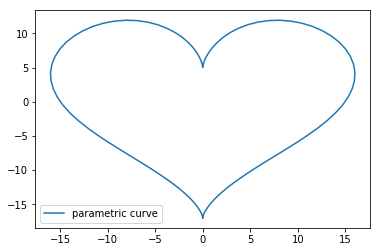

In [111]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca()


# Prepare arrays x, y, z
t = np.linspace(t_0, t_max, 100)
x = 16*np.sin(t)**3
y = 13*np.cos(t) - 5*(np.cos(2*t)) -2*np.cos(3*t) - np.cos(4*t)

ax.plot(x, y, label='parametric curve')
ax.legend()

plt.show()


In [42]:
hiya = Point2D((-(-208*sin(u) + 160*sin(2*u) + 96*sin(3*u) + 64*sin(4*u))*sin(sin(sin(u))) + 16*(-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*sin(sin(sin(u))))/(13*sin(u) - 10*sin(2*u) - 6*sin(3*u) - 4*sin(4*u)), zoo*(256*(-13*sin(u) + 10*sin(2*u) + 6*sin(3*u) + 4*sin(4*u))*sin(sin(sin(u))) + (3328*sin(u) - 2560*sin(2*u) - 1536*sin(3*u) - 1024*sin(4*u))*sin(sin(sin(u))))/(13*sin(u) - 10*sin(2*u) - 6*sin(3*u) - 4*sin(4*u)))
hiya.func(dict(old="u", new="0.0101010101010101"))

NameError: name 'zoo' is not defined